<a id="1"></a>
<div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#4CAF50; box-sizing: border-box;">
    <b>🍌 Banana Leaf Disease Classification 🍃</b>
</div>

<p style="text-align:center; font-size:20px; font-family:Serif; margin-top:15px;">
    Detecting diseases in banana leaves using Artificial Intelligence 🌱🧠
</p>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
    <div style="text-align:center;">
        <img src="../data/test/healthy/3.jpeg" alt="Healthy Leaf" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Healthy</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/sigatoka/6.jpeg" alt="Sigatoka Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Sigatoka</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/cordana/4.jpeg" alt="Cordana Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Cordana</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/pestalotiopsis/1.jpeg" alt="Pestalotiopsis Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Pestalotiopsis</p>
    </div>
</div>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-top:20px;">
    <b>Models Used:</b> Transfer Learning with models for classification
</p>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-bottom:20px;">
    <b>Objective:</b> Improve detection of banana leaf diseases for early intervention in agriculture 🍌🌿
</p>


---
<h2 style=text-align:center;>Importación de Bibliotecas</h2>

En esta sección, importamos las bibliotecas necesarias para desarrollar el modelo de clasificación de imágenes

In [1]:
# Bibliotecas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

# Bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de procesamiento de datos y métricas
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [2]:
# Rutas de los conjuntos de datos
train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Parámetros
img_height, img_width = 224, 224
batch_size = 32

# Aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Sólo reescalar para validación y prueba
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Para evaluar correctamente
)


Found 655 images belonging to 4 classes.
Found 92 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


In [3]:
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model_vgg = Sequential([
    base_model_vgg,
    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax')
])


# Congelar las capas del modelo base para no entrenarlas de nuevo
base_model_vgg.trainable = False


In [5]:
# Compilar el modelo (puedes ajustar el optimizador o la tasa de aprendizaje según sea necesario)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,872,004 (125.40 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [6]:
# Entrenar el modelo con tus datos
history = model_vgg.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=20, 
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_steps = valid_generator.samples // batch_size,
                    verbose=1)

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.3952 - loss: 6.0071 - val_accuracy: 0.6406 - val_loss: 1.3137
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1:55 6s/step - accuracy: 0.5312 - loss: 2.3975

C:\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.5312 - loss: 2.3975 - val_accuracy: 0.7143 - val_loss: 0.9226
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.6380 - loss: 1.3398 - val_accuracy: 0.7656 - val_loss: 0.5108
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - accuracy: 0.8438 - loss: 0.4580 - val_accuracy: 0.8929 - val_loss: 0.2582
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.7839 - loss: 0.5580 - val_accuracy: 0.8906 - val_loss: 0.3476
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.8438 - loss: 0.5243 - val_accuracy: 0.8571 - val_loss: 0.3312
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 147s 7s/step - accuracy: 0.8360 - loss: 0.5003 - val_accuracy: 0.8906 - val_loss: 0.2782
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.7500 - loss: 0.4719 - val_accuracy: 0.8571 - val_loss: 0.3372
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 233s 12s/step - accuracy: 0.8248 - loss: 0.4519 - val_accuracy: 0.8906 - val

In [7]:
# Evaluar en el conjunto de prueba
val_loss, val_accuracy = model_vgg.evaluate(valid_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - accuracy: 0.9440 - loss: 0.1808
Validation accuracy: 0.93


In [11]:
val_loss, val_accuracy = model_vgg.evaluate(valid_generator, steps=valid_generator.samples // batch_size)
print(f'Precisión en el conjunto de validación: {val_accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.9271 - loss: 0.1853
Precisión en el conjunto de validación: 93.75%


Found 190 images belonging to 4 classes.


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/6 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step


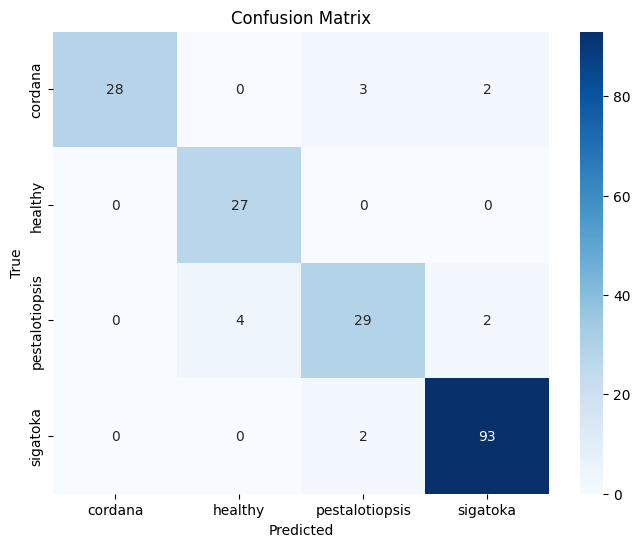

Reporte de Clasificación:
                precision    recall  f1-score   support

       cordana       1.00      0.85      0.92        33
       healthy       0.87      1.00      0.93        27
pestalotiopsis       0.85      0.83      0.84        35
      sigatoka       0.96      0.98      0.97        95

      accuracy                           0.93       190
     macro avg       0.92      0.91      0.91       190
  weighted avg       0.93      0.93      0.93       190



In [13]:
# Ruta a tus datos
test_dir = '../data/test'

# Preprocesamiento del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para obtener las etiquetas en el mismo orden
)

# Obtener las predicciones del modelo
predictions = model_vgg.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generar el reporte de clasificación con precisión, recall, F1-score, etc.
class_report = classification_report(y_true, y_pred, target_names=class_labels)  # Cambiado aquí
print("Reporte de Clasificación:")
print(class_report)


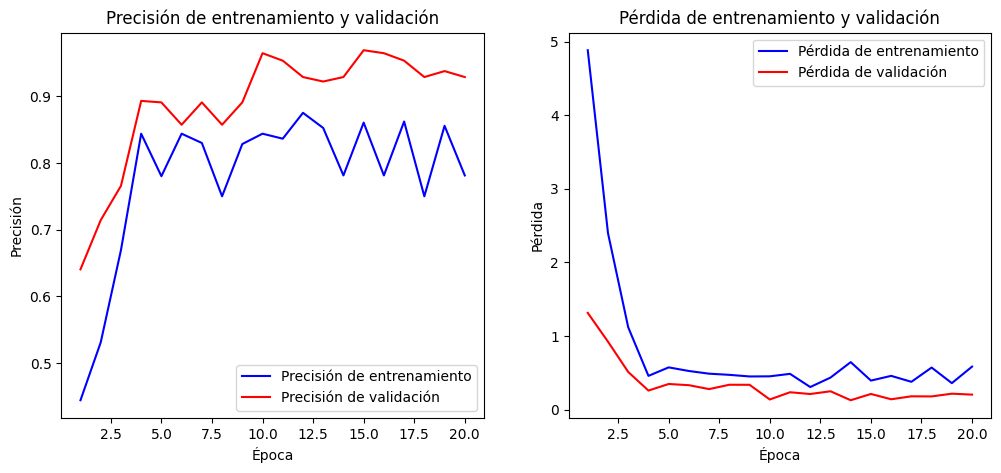

In [9]:
# Graficar las curvas de entrenamiento
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, min(len(acc), len(val_acc), len(loss), len(val_loss)) + 1)

    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc[:len(epochs)], 'b-', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc[:len(epochs)], 'r-', label='Precisión de validación')
    plt.title('Precisión de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss[:len(epochs)], 'b-', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss[:len(epochs)], 'r-', label='Pérdida de validación')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history)